In [3]:
import os
import sys
import urllib.request
client_id = ""
client_secret = ""
url = "https://openapi.naver.com/v1/datalab/search"
body = "{\"startDate\":\"2021-01-01\",\"endDate\":\"2021-12-31\",\"timeUnit\":\"date\",\"keywordGroups\":[{\"groupName\":\"전쟁\",\"keywords\":[\"우크라이나\",\"러시아\"]}],\"device\":\"pc\",\"ages\":[\"1\",\"2\"]}";

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)
result_json=response

{"startDate":"2021-01-01","endDate":"2021-12-31","timeUnit":"date","results":[{"title":"전쟁","keywords":["우크라이나","러시아"],"data":[{"period":"2021-01-01","ratio":18},{"period":"2021-01-02","ratio":25},{"period":"2021-01-03","ratio":27.5},{"period":"2021-01-04","ratio":28},{"period":"2021-01-05","ratio":29.5},{"period":"2021-01-06","ratio":22},{"period":"2021-01-07","ratio":29},{"period":"2021-01-08","ratio":33},{"period":"2021-01-09","ratio":10},{"period":"2021-01-10","ratio":25.5},{"period":"2021-01-11","ratio":16.5},{"period":"2021-01-12","ratio":20},{"period":"2021-01-13","ratio":10.5},{"period":"2021-01-14","ratio":21.5},{"period":"2021-01-15","ratio":17},{"period":"2021-01-16","ratio":20.49999},{"period":"2021-01-17","ratio":20},{"period":"2021-01-18","ratio":17},{"period":"2021-01-19","ratio":18.5},{"period":"2021-01-20","ratio":20},{"period":"2021-01-21","ratio":19.5},{"period":"2021-01-22","ratio":24},{"period":"2021-01-23","ratio":21},{"period":"2021-01-24","ratio":26.5},{"period"

In [4]:
import json

In [5]:
result_json=json.loads(response_body.decode('utf-8'))

In [6]:
result_json['results']

[{'title': '전쟁',
  'keywords': ['우크라이나', '러시아'],
  'data': [{'period': '2021-01-01', 'ratio': 18},
   {'period': '2021-01-02', 'ratio': 25},
   {'period': '2021-01-03', 'ratio': 27.5},
   {'period': '2021-01-04', 'ratio': 28},
   {'period': '2021-01-05', 'ratio': 29.5},
   {'period': '2021-01-06', 'ratio': 22},
   {'period': '2021-01-07', 'ratio': 29},
   {'period': '2021-01-08', 'ratio': 33},
   {'period': '2021-01-09', 'ratio': 10},
   {'period': '2021-01-10', 'ratio': 25.5},
   {'period': '2021-01-11', 'ratio': 16.5},
   {'period': '2021-01-12', 'ratio': 20},
   {'period': '2021-01-13', 'ratio': 10.5},
   {'period': '2021-01-14', 'ratio': 21.5},
   {'period': '2021-01-15', 'ratio': 17},
   {'period': '2021-01-16', 'ratio': 20.49999},
   {'period': '2021-01-17', 'ratio': 20},
   {'period': '2021-01-18', 'ratio': 17},
   {'period': '2021-01-19', 'ratio': 18.5},
   {'period': '2021-01-20', 'ratio': 20},
   {'period': '2021-01-21', 'ratio': 19.5},
   {'period': '2021-01-22', 'ratio': 24

In [7]:
len(result_json['results'][0]['data'])

365

In [8]:
import pickle

In [9]:
with open('datalab_trend.json', 'wb') as fp:
    pickle.dump(result_json['results'][0]['data'], fp)

In [10]:
with open('datalab_trend.json', 'rb') as fp:
    json_read_data=pickle.load(fp)

In [11]:
json_read_data

[{'period': '2021-01-01', 'ratio': 18},
 {'period': '2021-01-02', 'ratio': 25},
 {'period': '2021-01-03', 'ratio': 27.5},
 {'period': '2021-01-04', 'ratio': 28},
 {'period': '2021-01-05', 'ratio': 29.5},
 {'period': '2021-01-06', 'ratio': 22},
 {'period': '2021-01-07', 'ratio': 29},
 {'period': '2021-01-08', 'ratio': 33},
 {'period': '2021-01-09', 'ratio': 10},
 {'period': '2021-01-10', 'ratio': 25.5},
 {'period': '2021-01-11', 'ratio': 16.5},
 {'period': '2021-01-12', 'ratio': 20},
 {'period': '2021-01-13', 'ratio': 10.5},
 {'period': '2021-01-14', 'ratio': 21.5},
 {'period': '2021-01-15', 'ratio': 17},
 {'period': '2021-01-16', 'ratio': 20.49999},
 {'period': '2021-01-17', 'ratio': 20},
 {'period': '2021-01-18', 'ratio': 17},
 {'period': '2021-01-19', 'ratio': 18.5},
 {'period': '2021-01-20', 'ratio': 20},
 {'period': '2021-01-21', 'ratio': 19.5},
 {'period': '2021-01-22', 'ratio': 24},
 {'period': '2021-01-23', 'ratio': 21},
 {'period': '2021-01-24', 'ratio': 26.5},
 {'period': '202

In [12]:
import pandas as pd
import numpy as np

In [13]:
df_test=pd.DataFrame(json_read_data) #[dic, dic, dic]
df_test

,period,ratio
0,2021-01-01,18.00000
1,2021-01-02,25.00000
2,2021-01-03,27.50000
3,2021-01-04,28.00000
4,2021-01-05,29.50000
...,...,...
360,2021-12-27,40.99999
361,2021-12-28,51.00000
362,2021-12-29,24.50000
363,2021-12-30,26.50000


In [14]:
df_test.rename(columns={'period':'검색일'}, inplace=True)
df_test.rename(columns={'ratio':'검색량의 일별 상대적 비율'}, inplace=True)
df_test

,검색일,검색량의 일별 상대적 비율
0,2021-01-01,18.00000
1,2021-01-02,25.00000
2,2021-01-03,27.50000
3,2021-01-04,28.00000
4,2021-01-05,29.50000
...,...,...
360,2021-12-27,40.99999
361,2021-12-28,51.00000
362,2021-12-29,24.50000
363,2021-12-30,26.50000


In [15]:
df_test.to_csv('trend.csv', encoding='utf8')

In [16]:
df_test2=pd.read_csv('trend.csv', encoding='utf8')
df_test2.drop('Unnamed: 0', axis=1)

,검색일,검색량의 일별 상대적 비율
0,2021-01-01,18.00000
1,2021-01-02,25.00000
2,2021-01-03,27.50000
3,2021-01-04,28.00000
4,2021-01-05,29.50000
...,...,...
360,2021-12-27,40.99999
361,2021-12-28,51.00000
362,2021-12-29,24.50000
363,2021-12-30,26.50000


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
from matplotlib import rc
import matplotlib.font_manager as fm

fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumGothic.ttf'

font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

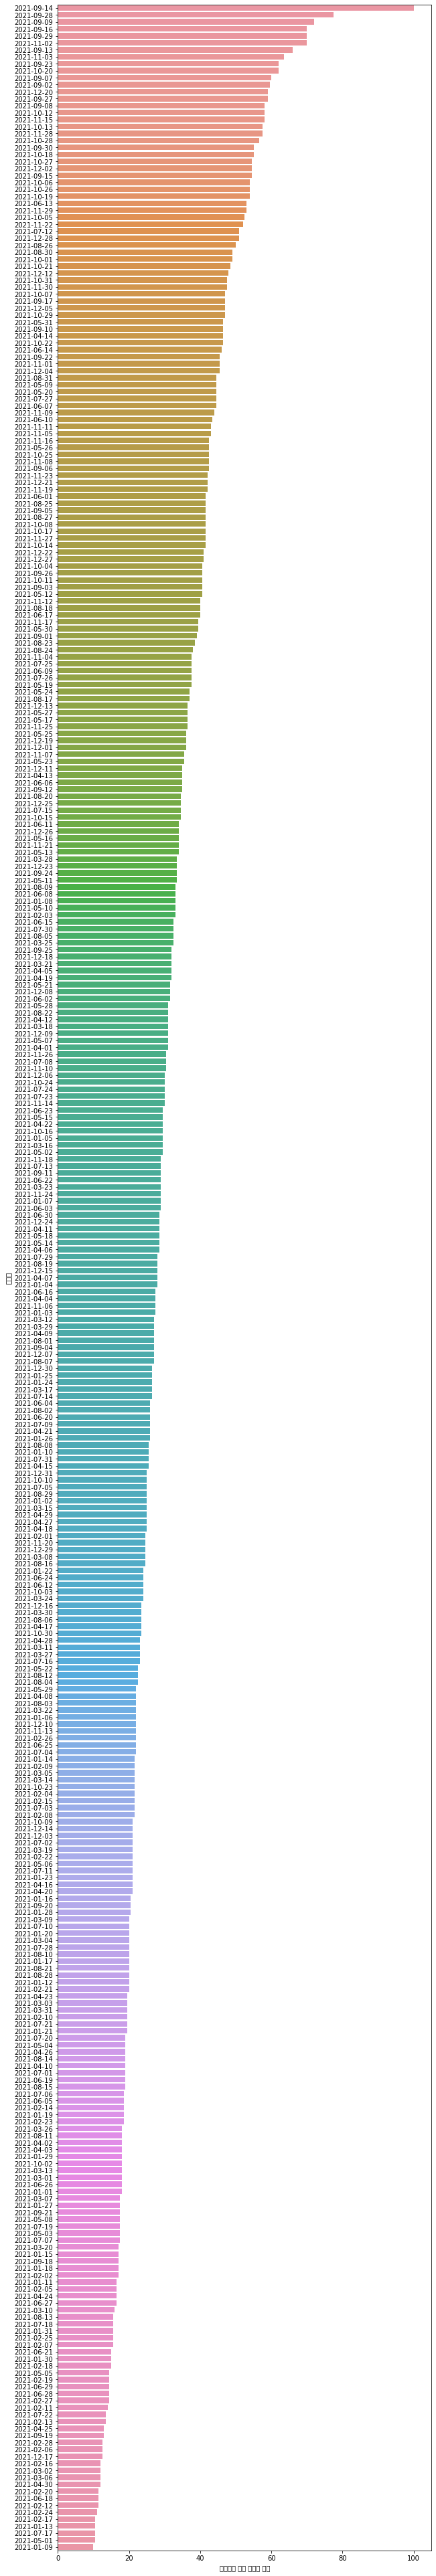

In [28]:
plt.rcParams["figure.figsize"]=(10,70)
plt.rcParams["font.size"]=10
sns.barplot(y='검색일', x='검색량의 일별 상대적 비율', data=df_test2.sort_values('검색량의 일별 상대적 비율', ascending=False))

In [29]:
day_list=[]
for i in range(365):
    temp=df_test2['검색일'][i].split('-')
    day_list.append(str(int(temp[1]))+"."+str(int(temp[2])))
day_list

['1.1',
 '1.2',
 '1.3',
 '1.4',
 '1.5',
 '1.6',
 '1.7',
 '1.8',
 '1.9',
 '1.10',
 '1.11',
 '1.12',
 '1.13',
 '1.14',
 '1.15',
 '1.16',
 '1.17',
 '1.18',
 '1.19',
 '1.20',
 '1.21',
 '1.22',
 '1.23',
 '1.24',
 '1.25',
 '1.26',
 '1.27',
 '1.28',
 '1.29',
 '1.30',
 '1.31',
 '2.1',
 '2.2',
 '2.3',
 '2.4',
 '2.5',
 '2.6',
 '2.7',
 '2.8',
 '2.9',
 '2.10',
 '2.11',
 '2.12',
 '2.13',
 '2.14',
 '2.15',
 '2.16',
 '2.17',
 '2.18',
 '2.19',
 '2.20',
 '2.21',
 '2.22',
 '2.23',
 '2.24',
 '2.25',
 '2.26',
 '2.27',
 '2.28',
 '3.1',
 '3.2',
 '3.3',
 '3.4',
 '3.5',
 '3.6',
 '3.7',
 '3.8',
 '3.9',
 '3.10',
 '3.11',
 '3.12',
 '3.13',
 '3.14',
 '3.15',
 '3.16',
 '3.17',
 '3.18',
 '3.19',
 '3.20',
 '3.21',
 '3.22',
 '3.23',
 '3.24',
 '3.25',
 '3.26',
 '3.27',
 '3.28',
 '3.29',
 '3.30',
 '3.31',
 '4.1',
 '4.2',
 '4.3',
 '4.4',
 '4.5',
 '4.6',
 '4.7',
 '4.8',
 '4.9',
 '4.10',
 '4.11',
 '4.12',
 '4.13',
 '4.14',
 '4.15',
 '4.16',
 '4.17',
 '4.18',
 '4.19',
 '4.20',
 '4.21',
 '4.22',
 '4.23',
 '4.24',
 '4.25',
 

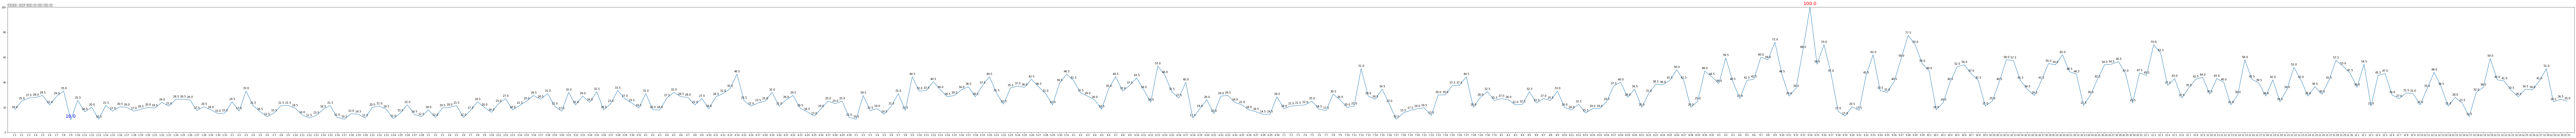

In [30]:
plt.figure(figsize=(200,10))
plt.plot(day_list, df_test2['검색량의 일별 상대적 비율'])
plt.title("[우크라이나, 러시아] 검색어의 일별 검색량 상대적 비율", loc='left')
plt.xlim([-1, 365])      # X축의 범위: [xmin, xmax]
plt.ylim([0, 100])     # Y축의 범위: [ymin, ymax]

for i in range(365):
    height=df_test2['검색량의 일별 상대적 비율'][i]
    if i==8:
        plt.text(day_list[8], height+1, '%.1f' %df_test2['검색량의 일별 상대적 비율'][8], ha='center', va='bottom', size=20, fontdict={'color': 'blue'})
    elif i==256:
        plt.text(day_list[256], height+1, '%.1f' %df_test2['검색량의 일별 상대적 비율'][256], ha='center', va='bottom', size=20, fontdict={'color': 'red'})
    else:
        plt.text(day_list[i], height+1, '%.1f' %height, ha='center', va='bottom', size=12)

plt.show()

In [31]:
min(df_test2['검색량의 일별 상대적 비율'])

10.0

In [32]:
df_test2.loc[df_test2['검색량의 일별 상대적 비율'] == min(df_test2['검색량의 일별 상대적 비율'])]

,Unnamed: 0,검색일,검색량의 일별 상대적 비율
8,8,2021-01-09,10.0


In [33]:
df_test2.loc[df_test2['검색량의 일별 상대적 비율'] == max(df_test2['검색량의 일별 상대적 비율'])]

,Unnamed: 0,검색일,검색량의 일별 상대적 비율
256,256,2021-09-14,100.0


In [34]:
df_test2.loc[256,'검색량의 일별 상대적 비율']

100.0

In [26]:
df_test2.loc[8,'검색량의 일별 상대적 비율']

10.0